In [12]:
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from generate_simulation import *
import general_plotter as plotter
import generate_simulation
#import eval_helper as eh
import my_eval_helper as meh
import curve_fitting as cf
import time
from vclamp_evaluator import VclampEvaluatorHMM
import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.DEBUG)  #logging.DEBUG when debug required
import os


channel_name = 'na12HMM'

mutant = 'R850P'

csv_file =  './csv_files/params_na12_new_050724.csv'  

deliv_path = './deliverables/na12Muts/Giselle/'
cp_file =f'{deliv_path}R850P_062624.pkl' '



mutname = 'R850P'
root_path_out = './Plots_Folder/Giselle_Plots'
if not os.path.exists(root_path_out):
        os.makedirs(root_path_out)

wild_type_params = 'na12_HMM_TF050724.json'

objective_names=['IV_peak','v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope',
                     'tau0','percent_fast','rec_raw','bottom_inact','peak_amp','ramp','persistent', 'time_to_peak','ramp_ivec']

weights={'IV_peak':50, 'v_half_act':100, 'gv_slope':[15,15], 'v_half_ssi':200, 'ssi_slope':22.114, 
     'tau0' :1200, 'tau_fast':92.148,'tau_slow':1762.099,'percent_fast':1.013, 'rec_raw':100,'bottom_inact':1, 
     'peak_amp':1,  'ramp':10,'ramp_ivec':150, 'persistent':1118, 'time_to_peak':100, 'prst_curr' :1}




evaluator = VclampEvaluatorHMM(csv_file ,mutant ,channel_name, objective_names= objective_names,weights = weights, wt_filename = wild_type_params) #ttp to time_to_peak


                                     

DEBUG:loading with the wildtype filename


gmax is 0.031631986971787096 vhalf is -24.097373301642303 s is 1.5095948100340213


DEBUG:protocol csv read successful ['Name', ' Current Density (%WT)', 'DV1/2 Act', 'GV Slope (% WT)', 'DV1/2 SSI', 'SSI Slope (%WT)', 'Tau Fast (%WT)', 'Tau Slow (%WT)', '% Fast', 'UDB20', 'Tau 0mV (%WT)', 'Ramp (%WT)', 'Persistent (%WT)', 'Time to Peak', ' Bottom Inact\n']
DEBUG:Protocols dictionary assigned


{'IV_peak': '73.67', 'dv_half_act': '8.96', 'gv_slope': '122.40', 'dv_half_ssi': '-3.81', 'ssi_slope': '106', 'percent_fast': '91', 'tau_fast': '158.69', 'tau_slow': '134.07', 'tau0': '106.92', 'ramp': '120.6', 'persistent': '65.07', 'time_to_peak': '0', 'bottom_inact': '0\n'}


DEBUG:Mutant Data Init Complete ( INSIDE VCLAMP CLASS)


In [13]:
errordict = {}
for objective in objective_names : errordict[objective] = 0

    
errordict['ramp'] = 10

errordict['v_half_act']=20
print(errordict)

print(list(errordict.values()))

{'IV_peak': 0, 'v_half_act': 20, 'gv_slope': 0, 'v_half_ssi': 0, 'ssi_slope': 0, 'tau0': 0, 'percent_fast': 0, 'rec_raw': 0, 'bottom_inact': 0, 'peak_amp': 0, 'ramp': 10, 'persistent': 0, 'time_to_peak': 0, 'ramp_ivec': 0}
[0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0]


In [14]:
print(evaluator.init_WT)

[62.774771313021546, 0.6854152336583206, 3.2117067311143277, 0.1432460480232296, 2468.966900014909, 0.0834387238328, 490.16060600231606, 2.969500725999265, 190.5883640336242, 0.003108395956123883, 7689.251014289831, 0.04054164070835632, 4.063594186259147, 2.115884898210715, 0.1433653421971472, 1.3563238605774417, 6568.351916792737, 0.011127551783912584, -18.276678986708095, 16.74204011921361, 6.170113221706686]


In [15]:
print(evaluator.protocols) #Relative data or differences

{'IV_peak': '73.67', 'dv_half_act': '8.96', 'gv_slope': '122.40', 'dv_half_ssi': '-3.81', 'ssi_slope': '106', 'percent_fast': '91', 'tau_fast': '158.69', 'tau_slow': '134.07', 'tau0': '106.92', 'ramp': '120.6', 'persistent': '65.07', 'time_to_peak': '0', 'bottom_inact': '0\n'}


In [16]:
print(evaluator.wild_data) #Wild data

{'IV_peak': -2.36, 'v_half_act': -24.09737330163938, 'gv_slope': 1.5095948100307743, 'v_half_ssi': -52.944171490542686, 'ssi_slope': 5.090714682296222, 'rec_raw': [0.0026093972114625188, 0.0023155690990472742, 0.0037485203662057445, 0.006258524013466823, 0.010493084390641505, 0.029495315132444355, 0.053606897257777446, 0.0929397622759723, 0.13549118724662884, 0.2506518544899102, 0.41277236818602503, 0.6072060435421138, 0.9261170768925631, 0.990660408779861], 'tau_fast': 905.1743703195734, 'tau_slow': 1880.414277776559, 'percent_fast': 72.79185643171041, 'tau0': 0.8312067688526961, 'ramp': 0.16765407444373945, 'ramp_ivec': [1.1999999479141201, -5.8222673689510345e-09, -5.442733033503636e-09, -5.09821835166662e-09, -4.7937922963580716e-09, -4.5135865415045206e-09, -4.250262880434294e-09, -4.014705744899853e-09, -3.789971799450572e-09, -3.5798649715706676e-09, -3.3914996643158e-09, -3.203132314918678e-09, -3.0365017492899036e-09, -2.8771138196201072e-09, -2.7249723011006352e-09, -2.580074

In [17]:
print(evaluator.mutant_data) #Mutant data (Sum of wild_data and protocols)

{'IV_peak': -1.738612, 'v_half_act': -15.137373301639379, 'gv_slope': 1.8477440474776679, 'v_half_ssi': -56.75417149054269, 'ssi_slope': 5.396157563233995, 'tau0': 0.8887262772573027, 'percent_fast': 66.24058935285647, 'rec_raw': array([0.0026853 , 0.0029858 , 0.00388674, 0.00544635, 0.0080799 ,
       0.0199592 , 0.03518081, 0.06038114, 0.08818633, 0.16656679,
       0.28621508, 0.44960239, 0.81905152, 0.94529834]), 'tau_fast': 1436.421208260131, 'tau_slow': 2521.0714222150327, 'ramp': 0.20219081377914974, 'ramp_ivec': [1.1999999479141201, -5.8222673689510345e-09, -5.442733033503636e-09, -5.09821835166662e-09, -4.7937922963580716e-09, -4.5135865415045206e-09, -4.250262880434294e-09, -4.014705744899853e-09, -3.789971799450572e-09, -3.5798649715706676e-09, -3.3914996643158e-09, -3.203132314918678e-09, -3.0365017492899036e-09, -2.8771138196201072e-09, -2.7249723011006352e-09, -2.5800744411634036e-09, -2.442422750845035e-09, -2.3192606035706938e-09, -2.1960967279168573e-09, -2.08017976290

In [18]:
opt_data = pickle.load( open( cp_file, "rb" ) )
print(opt_data.keys())
hof = opt_data['halloffame']
log = opt_data['logbook']
generation = opt_data['generation']
print(generation)

dict_keys(['population', 'generation', 'parents', 'halloffame', 'history', 'logbook', 'rndstate'])
421


In [22]:
new_dict = meh.json_load(wild_type_params)
print(len(new_dict.keys()))
print(log)

21
gen	nevals	avg         	std        	min    	max         
1  	500   	5.76534e+06 	1.68778e+07	19180.9	7.75611e+07 
2  	500   	1.16633e+07 	4.24573e+07	2840.29	7.21752e+08 
3  	500   	1.79769e+305	inf        	2205.05	1.79769e+308
4  	500   	inf         	inf        	2205.05	1.79769e+308
5  	500   	inf         	inf        	2205.05	1.79769e+308
6  	500   	inf         	inf        	2205.05	1.79769e+308
7  	500   	inf         	inf        	2205.05	1.79769e+308
8  	500   	1.79769e+305	inf        	2205.05	1.79769e+308
9  	500   	1.79769e+305	inf        	1806.33	1.79769e+308
10 	500   	inf         	inf        	2205.05	1.79769e+308
11 	500   	inf         	inf        	2171.19	1.79769e+308
12 	500   	inf         	inf        	2945.05	1.79769e+308
13 	500   	inf         	inf        	2708   	1.79769e+308
14 	500   	1.36459e+07 	8.30965e+07	1832.09	1.76204e+09 
15 	500   	inf         	inf        	2060.89	1.79769e+308
16 	500   	1.79769e+305	inf        	1827.47	1.79769e+308
17 	500   	1.24025e+07 	8.57

In [20]:
best_hof = hof[0]
p = best_hof
print("Best params: " + str(best_hof))

Best params: [41.24466597259794, 0.5308501317510134, 7.386920140708283, 0.008256767752317935, 10755.581571569404, 0.2941534968877462, 508.5221717496915, 0.8344607280938177, 357.34870015416504, 0.0002195891536895594, 1070.0986194771494, 0.027183145081577945, 3.7310446112469187, 11.870394633074387, 0.11998196950856949, 11.265619816992157, 711379.2077178769, 0.0020378247251452777, -9.743154184024819, 0.4138496607777782, 10.159989993015305]


In [11]:
#27 June
"""{'a1_0': 61.34658052912406, 'a1_1': 0.8920621991955839, 'b1_0': 2.5765456377517255, 'b1_1': 0.06284336466238569, 'a2_0': 4980.486906576876, 'a2_1': 0.011142986570965324, 'b2_0': 177.12817559929417, 'b2_1': 2.54788211542916, 'a3_0': 223.9110922434981, 'a3_1': 0.017465559721563103, 'b3_0': 2271.4840135218055, 'b3_1': 0.13882767854643585, 'bh_0': 1.8406226561109458, 'bh_1': 0.5203295481589272, 'bh_2': 0.15175148297446667, 'ah_0': 19.3954970760955, 'ah_1': 347202.4165332446, 'ah_2': 0.012820638111744248, 'vShift': -11.853522052228632, 'vShift_inact': 7.770607088646434, 'maxrate': 7.318035749668481}
"""
keys = [
    "a1_0", "a1_1", "b1_0", "b1_1", "a2_0", "a2_1", "b2_0", "b2_1",
    "a3_0", "a3_1", "b3_0", "b3_1", "bh_0", "bh_1", "bh_2", "ah_0",
    "ah_1", "ah_2", "vShift", "vShift_inact", "maxrate"
]
best_hof_dict = dict(zip(keys, best_hof))
print(best_hof_dict)

{'a1_0': 61.34658052912406, 'a1_1': 0.8920621991955839, 'b1_0': 2.5765456377517255, 'b1_1': 0.06284336466238569, 'a2_0': 4980.486906576876, 'a2_1': 0.011142986570965324, 'b2_0': 177.12817559929417, 'b2_1': 2.54788211542916, 'a3_0': 223.9110922434981, 'a3_1': 0.017465559721563103, 'b3_0': 2271.4840135218055, 'b3_1': 0.13882767854643585, 'bh_0': 1.8406226561109458, 'bh_1': 0.5203295481589272, 'bh_2': 0.15175148297446667, 'ah_0': 19.3954970760955, 'ah_1': 347202.4165332446, 'ah_2': 0.012820638111744248, 'vShift': -11.853522052228632, 'vShift_inact': 7.770607088646434, 'maxrate': 7.318035749668481}


In [21]:
#26 June 
"""{'a1_0': 41.24466597259794, 'a1_1': 0.5308501317510134, 'b1_0': 7.386920140708283, 'b1_1': 0.008256767752317935, 'a2_0': 10755.581571569404, 'a2_1': 0.2941534968877462, 'b2_0': 508.5221717496915, 'b2_1': 0.8344607280938177, 'a3_0': 357.34870015416504, 'a3_1': 0.0002195891536895594, 'b3_0': 1070.0986194771494, 'b3_1': 0.027183145081577945, 'bh_0': 3.7310446112469187, 'bh_1': 11.870394633074387, 'bh_2': 0.11998196950856949, 'ah_0': 11.265619816992157, 'ah_1': 711379.2077178769, 'ah_2': 0.0020378247251452777, 'vShift': -9.743154184024819, 'vShift_inact': 0.4138496607777782, 'maxrate': 10.159989993015305}
"""
keys = [
    "a1_0", "a1_1", "b1_0", "b1_1", "a2_0", "a2_1", "b2_0", "b2_1",
    "a3_0", "a3_1", "b3_0", "b3_1", "bh_0", "bh_1", "bh_2", "ah_0",
    "ah_1", "ah_2", "vShift", "vShift_inact", "maxrate"
]
best_hof_dict = dict(zip(keys, best_hof))
print(best_hof_dict)

{'a1_0': 41.24466597259794, 'a1_1': 0.5308501317510134, 'b1_0': 7.386920140708283, 'b1_1': 0.008256767752317935, 'a2_0': 10755.581571569404, 'a2_1': 0.2941534968877462, 'b2_0': 508.5221717496915, 'b2_1': 0.8344607280938177, 'a3_0': 357.34870015416504, 'a3_1': 0.0002195891536895594, 'b3_0': 1070.0986194771494, 'b3_1': 0.027183145081577945, 'bh_0': 3.7310446112469187, 'bh_1': 11.870394633074387, 'bh_2': 0.11998196950856949, 'ah_0': 11.265619816992157, 'ah_1': 711379.2077178769, 'ah_2': 0.0020378247251452777, 'vShift': -9.743154184024819, 'vShift_inact': 0.4138496607777782, 'maxrate': 10.159989993015305}


21
a1_0 - lb:0.0 ub:600.0 val:61.34658052912406 p:0.10224430088187343
a1_1 - lb:0.0 ub:2.0 val:0.8920621991955839 p:0.44603109959779197
b1_0 - lb:0.0 ub:10.0 val:2.5765456377517255 p:0.25765456377517254
b1_1 - lb:0.0 ub:1.0 val:0.06284336466238569 p:0.06284336466238569
a2_0 - lb:0.0 ub:25000.0 val:4980.486906576876 p:0.19921947626307504
a2_1 - lb:0.0 ub:1.0 val:0.011142986570965324 p:0.011142986570965324
b2_0 - lb:0.0 ub:1000.0 val:177.12817559929417 p:0.17712817559929417
b2_1 - lb:0.0 ub:10.0 val:2.54788211542916 p:0.254788211542916
a3_0 - lb:0.0 ub:600.0 val:223.9110922434981 p:0.3731851537391635
a3_1 - lb:0.0 ub:5.0 val:0.017465559721563103 p:0.0034931119443126204
b3_0 - lb:0.0 ub:10000.0 val:2271.4840135218055 p:0.22714840135218056
b3_1 - lb:0.0 ub:0.5 val:0.13882767854643585 p:0.2776553570928717
bh_0 - lb:0.0 ub:20.0 val:1.8406226561109458 p:0.09203113280554728
bh_1 - lb:0.0 ub:30.0 val:0.5203295481589272 p:0.01734431827196424
bh_2 - lb:0.0 ub:0.5 val:0.15175148297446667 p:0.30350

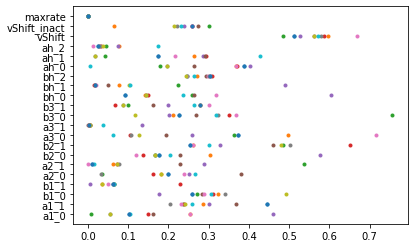

In [10]:
print(len(hof[11]))
plotter.plot_param_ranges(hof,csv_file,mutname+"_paramplot.pdf")#True)

In [11]:
meh.params_threshold_analysis(best_hof,csv_file,threshold=0.93)

Params under min: a2_1
Params under min: a3_1
Params under min: bh_1
Params under min: ah_2
Params under min: maxrate


In [12]:
meh.params_threshold_analysis_all(hof[0:9],csv_file,threshold = 0.93, min = 0.05)

Name		 vals<min	 	vals>max
a1_0		1		0
a1_1		0		0
b1_0		0		0
b1_1		4		0
a2_0		2		0
a2_1		2		0
b2_0		0		0
b2_1		0		0
a3_0		0		0
a3_1		8		0
b3_0		0		0
b3_1		0		0
bh_0		0		0
bh_1		5		0
bh_2		0		0
ah_0		0		0
ah_1		3		0
ah_2		7		0
vShift		0		0
vShift_inact		0		0
maxrate		9		0


 v_half = -52.944171490542686, ssi_slope = 5.090714682296222
Before penalizing = 5.396157563233995, After Penalizing 5.496157563233995
channel name = na12HMM
Before plot mutants ssi_slope = 4.571385847683213, v_half_inact = -57.33406737639398
 v_half = -57.33406737639398, ssi_slope = 4.571385847683213
Before penalizing = 5.396157563233995, After Penalizing 5.496157563233995
After plot mutants ssi_slope = 4.571385847683213, v_half_inact = -57.33406737639398
At the end of plot inact mutants are ssi_slope = 4.571385847683213, v_half_inact = -57.33406737639398


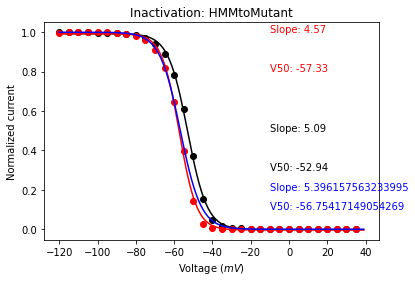

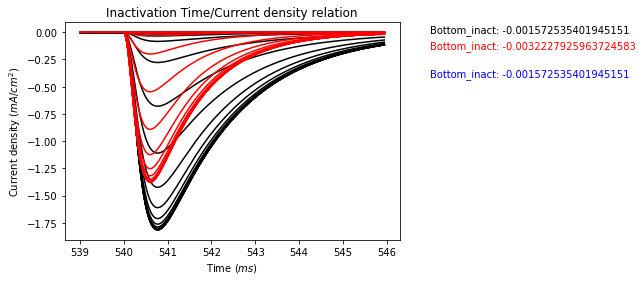

In [13]:
#Check top, bottom values in plot's curve 2
plotter.plot_inact(evaluator.init_WT, channel_name, best_hof,None,"./Plots_Folder/HMM_Mutant_Inact.pdf", "HMMtoMutant", evaluator.mutant_data, evaluator.objective_names,csv_file)



In [14]:
print(evaluator.objective_names)

['IV_peak', 'v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope', 'tau0', 'percent_fast', 'rec_raw', 'bottom_inact', 'peak_amp', 'ramp', 'persistent', 'time_to_peak', 'ramp_ivec']


gmax is 0.031631986971787096 vhalf is -24.097373301642303 s is 1.5095948100340213
gmax is 0.016718525587770806 vhalf is -15.913356731325104 s is 0.9969938268856985
mut precent is:-1.738612
mut precent is:-1.738612


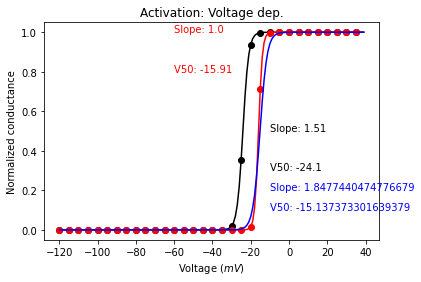

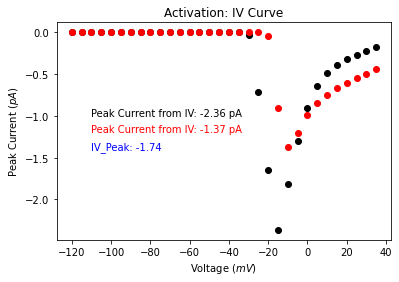

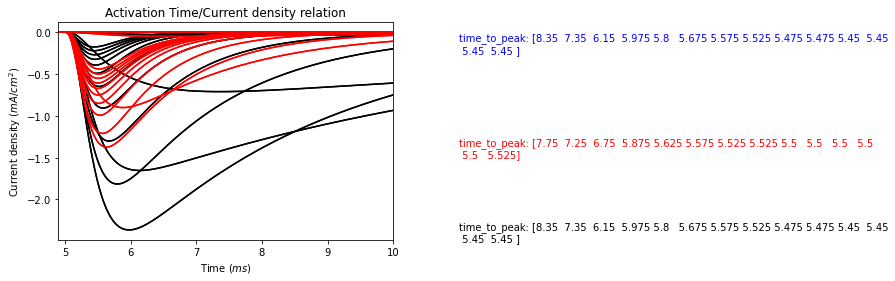

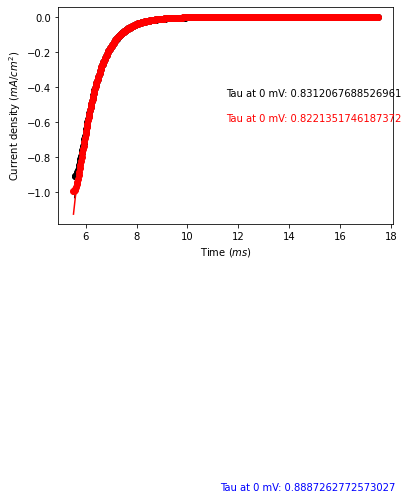

In [15]:
plotter.plot_act(evaluator.init_WT,channel_name , best_hof,None,"./Plots_Folder/HMM_Mutant.pdf", "HMMtoMutant",  evaluator.mutant_data,evaluator.wild_data, evaluator.objective_names,csv_file)

In [15]:
print(evaluator.init_WT)

[62.774771313021546, 0.6854152336583206, 3.2117067311143277, 0.1432460480232296, 2468.966900014909, 0.0834387238328, 490.16060600231606, 2.969500725999265, 190.5883640336242, 0.003108395956123883, 7689.251014289831, 0.04054164070835632, 4.063594186259147, 2.115884898210715, 0.1433653421971472, 1.3563238605774417, 6568.351916792737, 0.011127551783912584, -18.276678986708095, 16.74204011921361, 6.170113221706686]


x_values is [1.00e+00 1.50e+00 3.00e+00 5.60e+00 1.00e+01 3.00e+01 5.60e+01 1.00e+02
 1.50e+02 3.00e+02 5.60e+02 1.00e+03 2.93e+03 5.00e+03]
disp_log_time_vec = [0.         0.17609126 0.47712125 0.74818803 1.         1.47712125
 1.74818803 2.         2.17609126 2.47712125 2.74818803 3.
 3.46686762 3.69897   ], disp_rec_vec = [0.0026093972114625188, 0.0023155690990472742, 0.0037485203662057445, 0.006258524013466823, 0.010493084390641505, 0.029495315132444355, 0.053606897257777446, 0.0929397622759723, 0.13549118724662884, 0.2506518544899102, 0.41277236818602503, 0.6072060435421138, 0.9261170768925631, 0.990660408779861]
log_x_values = [0.         0.17609126 0.47712125 0.74818803 1.         1.47712125
 1.74818803 2.         2.17609126 2.47712125 2.74818803 3.
 3.46686762 3.69897   ], curve = [0.00304262 0.00352156 0.00495692 0.0074397  0.01162638 0.03042249
 0.05429332 0.09328269 0.13552982 0.2502003  0.41235252 0.60752944
 0.92606659 0.99067441]
x_values is [1.00e+00 1.50e+00 3.00e+00 5.

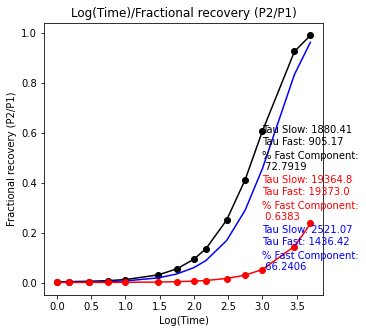

In [16]:
 plotter.my_recov_plots(evaluator.mutant_data, evaluator.init_WT, best_hof, channel_name, None, "./Plots_Folder/RFI_Plots.pdf",csv_file, indices = [])

 v_half = -52.944171490542686, ssi_slope = 5.090714682296222
Before penalizing = 5.396157563233995, After Penalizing 5.496157563233995
channel name = na12HMM
Before plot mutants ssi_slope = 4.571385847683213, v_half_inact = -57.33406737639398
 v_half = -57.33406737639398, ssi_slope = 4.571385847683213
Before penalizing = 5.396157563233995, After Penalizing 5.496157563233995
After plot mutants ssi_slope = 4.571385847683213, v_half_inact = -57.33406737639398
At the end of plot inact mutants are ssi_slope = 4.571385847683213, v_half_inact = -57.33406737639398
gmax is 0.031631986971787096 vhalf is -24.097373301642303 s is 1.5095948100340213
gmax is 0.016718525587770806 vhalf is -15.913356731325104 s is 0.9969938268856985
mut precent is:-1.738612
mut precent is:-1.738612
x_values is [1.00e+00 1.50e+00 3.00e+00 5.60e+00 1.00e+01 3.00e+01 5.60e+01 1.00e+02
 1.50e+02 3.00e+02 5.60e+02 1.00e+03 2.93e+03 5.00e+03]
disp_log_time_vec = [0.         0.17609126 0.47712125 0.74818803 1.         1.4771

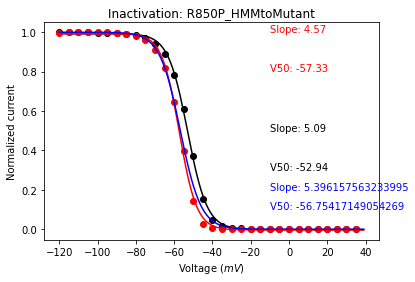

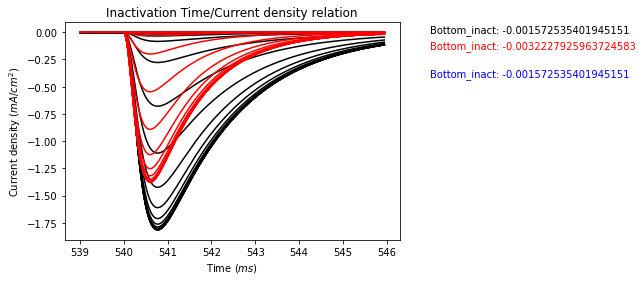

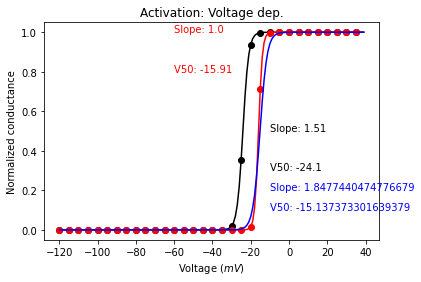

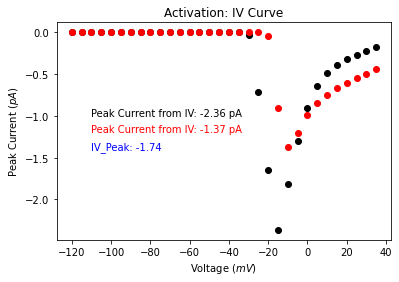

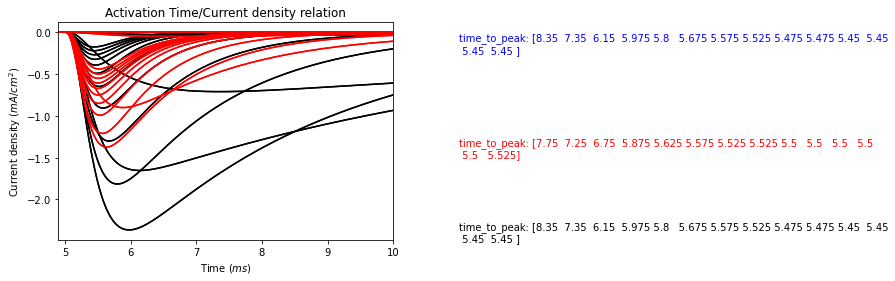

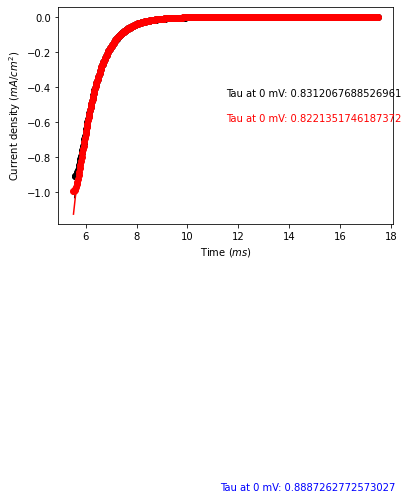

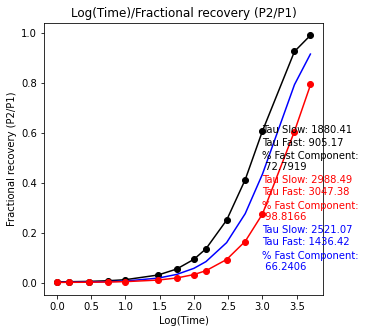

In [16]:
 plotter.plot_inact(evaluator.init_WT, channel_name, best_hof,None,
                           root_path_out+"/"+mutname+"_HMM_Mutant_Inact.pdf",
                           mutname+"_HMMtoMutant", evaluator.mutant_data, evaluator.objective_names,csv_file)


plotter.plot_act(evaluator.init_WT,channel_name , best_hof,None,
                         root_path_out+"/"+mutname+"_HMM_Mutant.pdf",
                         mutname+"_HMMtoMutant",  evaluator.mutant_data,evaluator.wild_data, evaluator.objective_names,csv_file)


plotter.my_recov_plots(evaluator.mutant_data, evaluator.init_WT, best_hof, channel_name, None,
                               root_path_out+"/"+mutname+"_RFI_Plots.pdf",csv_file, indices = [])
    
    


In [19]:
print(evaluator.objective_names)

['IV_peak', 'v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope', 'tau0', 'percent_fast', 'rec_raw', 'bottom_inact', 'peak_amp', 'ramp', 'persistent', 'time_to_peak', 'ramp_ivec']


In [20]:
print(evaluator.mutant_data)

{'IV_peak': -3.68, 'v_half_act': -19.691874941334003, 'gv_slope': 4.666043757169328, 'v_half_ssi': -53.09884795687228, 'ssi_slope': 6.200966239394968, 'tau0': 0.7961687303387344, 'percent_fast': 16.833447487924467, 'rec_raw': array([0.01440047, 0.01770035, 0.02753094, 0.04432802, 0.07206696,
       0.18794317, 0.31636207, 0.48736547, 0.62830229, 0.85262075,
       0.96632439, 0.99894893, 1.00518896, 1.00519732]), 'tau_fast': 295.7696235456371, 'tau_slow': 136.2095733411411, 'ramp': 0.2792355801236106, 'ramp_ivec': [1.1999999479141201, -4.1629147909871475e-12, -1.8382227119579574e-12, 2.1604582930527347e-12, 2.3031421359162167e-12, -4.121266342564005e-14, 2.4693683048832376e-12, -1.0530837770054596e-12, -9.095654074069735e-13, -9.045919959461538e-13, -9.040236080913702e-13, -9.040236107272e-13, -9.040236080913993e-13, -9.040236053628352e-13, -9.040236106791866e-13, -9.040236080905545e-13, -9.040236053628204e-13, -9.040236079970038e-13, -9.040236107255393e-13, -9.040236054091875e-13, -9.

gmax is 0.03458984645116838 vhalf is -15.451607848505466 s is 2.375443575126543
gmax is 0.031631986971787096 vhalf is -24.097373301642303 s is 1.5095948100340213


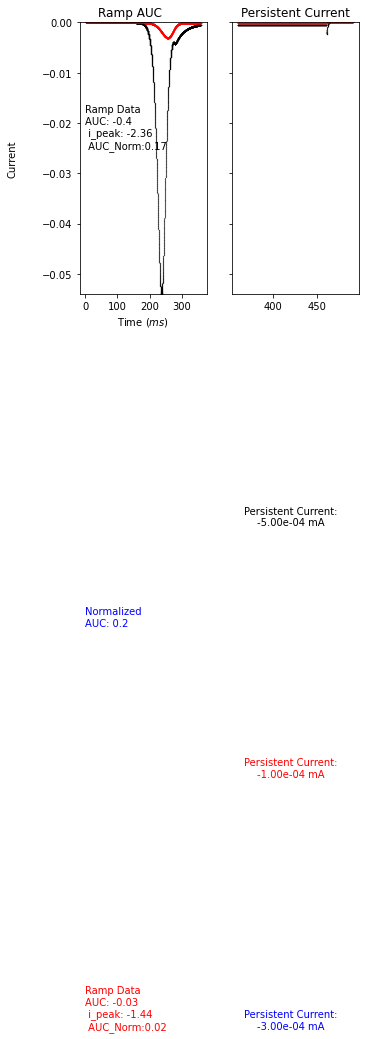

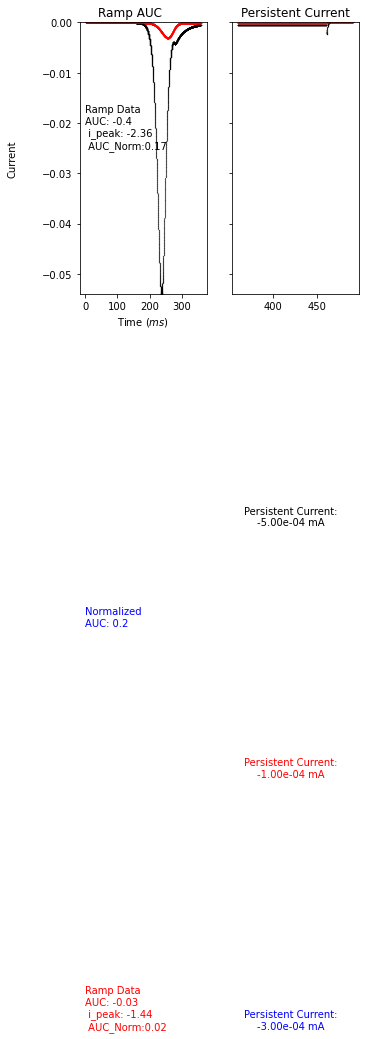

In [18]:
act_mut_obj = Activation_general(channel_name=channel_name)
act_wild_obj = Activation_general(channel_name=channel_name)

meh.change_param_values(csv_file,  channel_name, best_hof, sim_obj = act_mut_obj)
meh.change_param_values(csv_file,  channel_name, evaluator.init_WT, sim_obj = act_wild_obj)
act_mut_obj.genActivation()
act_wild_obj.genActivation()
plotter.make_ramp_plots(evaluator.mutant_data, evaluator.init_WT , channel_name, best_hof,  min(act_wild_obj.ipeak_vec), min(act_mut_obj.ipeak_vec), None, "./Plots_Folder/Ramp_Plots.pdf",csv_file)

#For saving to folder
plotter.make_ramp_plots(evaluator.mutant_data, evaluator.init_WT , channel_name, best_hof,  min(act_wild_obj.ipeak_vec), min(act_mut_obj.ipeak_vec), None, 
                                root_path_out+"/"+mutname+"_Ramp_Plots.pdf",csv_file)


# Test Scoring

In [22]:
c=0
for i in range(18,33):
    c=c+1
print(c)

15


In [23]:
#sf = evaluator.score_calculator

In [24]:
values =[ v for v in evaluator.wild_data.values()]
print(len(evaluator.init_WT))
print(len(hof[0]))
errors = evaluator.evaluate_with_lists(evaluator.init_WT) #Errors Tau slow and Tau fast
print(errors)
print(sum(errors))

21
21


DEBUG:SF percent_fast = 16.833447487924467
DEBUG:SF Normalizing factor = -3.6766854460865024
DEBUG:SF normalized ramp = 0.2792355801236106
DEBUG:percent_fast at error calc= 16.833447487924467
DEBUG:ramp_ivec_error:0.0
DEBUG:ramp ivec error no peak penalty:0.0 
DEBUG:error values :{'IV_peak': 0.0, 'v_half_act': 0.0, 'gv_slope': 0.0, 'v_half_ssi': 0.0, 'ssi_slope': 0.0, 'tau0': 3.4734531733012677e-32, 'percent_fast': 43.72771769473251, 'rec_raw': 0.0, 'bottom_inact': 0.0, 'peak_amp': 0.0, 'ramp': 0.0, 'persistent': 0.0, 'time_to_peak': 0.0, 'ramp_ivec': 0.0}
DEBUG:Error in EVAL LIST FN: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.47345317e-32 4.37277177e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.47345317e-32 4.37277177e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
43.72771769473251


In [25]:

print(values)

[-3.68, -19.691874941334003, 4.666043757169328, -53.09884795687228, 6.200966239394968, [0.008628843225615952, 0.01203681711973184, 0.022190842927576625, 0.039525341085287664, 0.06813802627642225, 0.18699855600011153, 0.3174074478052821, 0.48905782309085905, 0.629095766879257, 0.8512379486692657, 0.9663971282210225, 0.9996421253520115, 1.0049763725363152, 1.0049921940968012], 295.7696235456371, 136.2095733411411, 16.833447487924467, 0.7961687303387343, 0.2792355801236106, [1.1999999479141201, -4.1629147909871475e-12, -1.8382227119579574e-12, 2.1604582930527347e-12, 2.3031421359162167e-12, -4.121266342564005e-14, 2.4693683048832376e-12, -1.0530837770054596e-12, -9.095654074069735e-13, -9.045919959461538e-13, -9.040236080913702e-13, -9.040236107272e-13, -9.040236080913993e-13, -9.040236053628352e-13, -9.040236106791866e-13, -9.040236080905545e-13, -9.040236053628204e-13, -9.040236079970038e-13, -9.040236107255393e-13, -9.040236054091875e-13, -9.040236079978197e-13, -9.040236080433712e-13,

In [26]:
errors = evaluator.evaluate_with_lists(best_hof) #Errors Tau slow and Tau fast
for curr_obj,curr_err in zip(evaluator.objective_names,errors):
    print(f'{curr_obj}:{curr_err}- weight {weights[curr_obj]}')
print(errors)
print(sum(errors))
err_log = open(root_path_out+mutname +'errorlog.txt','w')
err_log.write(str(errors))
err_log.close()


DEBUG:SF percent_fast = 61.40321132003429
DEBUG:SF Normalizing factor = -2.831334076522424
DEBUG:SF normalized ramp = 0.17616336914840255
DEBUG:percent_fast at error calc= 61.40321132003429
DEBUG:ramp_ivec_error:3.9397421132502473
DEBUG:ramp ivec error no peak penalty:590.9613169875371 
DEBUG:error values :{'IV_peak': 5.493167500000001, 'v_half_act': 3.7993159714875415, 'gv_slope': 16.133892530944976, 'v_half_ssi': 265.0471320250525, 'ssi_slope': 6.055482646360554, 'tau0': 3.015562870368021, 'percent_fast': 1.4214530671947334, 'rec_raw': 331.55441122190285, 'bottom_inact': 2.556645713927628e-05, 'peak_amp': 3.2537497515847678, 'ramp': 2.1247761350635597, 'persistent': 0.00563033409538814, 'time_to_peak': 10.030031249999995, 'ramp_ivec': 590.9613169875371}
DEBUG:Error in EVAL LIST FN: [5.49316750e+00 3.79931597e+00 1.61338925e+01 2.65047132e+02
 6.05548265e+00 3.01556287e+00 1.42145307e+00 3.31554411e+02
 2.55664571e-05 3.25374975e+00 2.12477614e+00 5.63033410e-03
 1.00300312e+01 5.9096

IV_peak:5.493167500000001- weight 7.603
v_half_act:3.7993159714875415- weight 23.66
gv_slope:16.133892530944976- weight [7, 7]
v_half_ssi:265.0471320250525- weight 100
ssi_slope:6.055482646360554- weight 22.114
tau0:3.015562870368021- weight 2.818
percent_fast:1.4214530671947334- weight 1.013
rec_raw:331.55441122190285- weight 100
bottom_inact:2.556645713927628e-05- weight 1
peak_amp:3.2537497515847678- weight 1
ramp:2.1247761350635597- weight 200
persistent:0.00563033409538814- weight 1118
time_to_peak:10.030031249999995- weight 4.15
ramp_ivec:590.9613169875371- weight 150
[5.49316750e+00 3.79931597e+00 1.61338925e+01 2.65047132e+02
 6.05548265e+00 3.01556287e+00 1.42145307e+00 3.31554411e+02
 2.55664571e-05 3.25374975e+00 2.12477614e+00 5.63033410e-03
 1.00300312e+01 5.90961317e+02]
1238.895947858049


In [27]:
#Changed all na12mut8st to na16_8stWT
#param = {'a1_0': 797.8825745486204, 'a1_1': 0.3159053287649561, 'b1_0': 9.690438118665927, 'b1_1': 0.29604868925579353, 'a2_0': 130.8704901392516, 'a2_1': 0.1372230189801268, 'b2_0': 7.598497819023929, 'b2_1': 7.995076277447603, 'a3_0': 237.93614252762742, 'a3_1': 0.0975994992611237, 'b3_0': 97.73291578364909, 'b3_1': 0.05772655800035157, 'bh_0': 3.881493719157069, 'bh_1': 2.839665409126766, 'bh_2': 0.15365917148355313, 'ah_0': 116.57025337218312, 'ah_1': 11451.774550835245, 'ah_2': 0.021092870148869, 'vShift': -21.472636835227597, 'vShift_inact': 5.380631218774223, 'maxrate': 21562.15606098676, 'ahfactor': 38.754680823898504, 'bhfactor': 0.451981437065328}

objective_names=['IV_peak','v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope','tau_fast','tau_slow','percent_fast','tau0','ramp','persistent'] #'tau_fast', 'tau_slow', 'percent_fast', Removed
act_obj = Activation_general(channel_name=channel_name)
inact_obj = Inactivation_general(channel_name=channel_name)
recov_obj = RFI_general(channel_name=channel_name) #Added
ramp_obj = Ramp_general(channel_name=channel_name)

param_values = best_hof
#param_values = list(param.values())
#Change or include in function definition
params_csv = './csv_files/params_na12mut8st_mod_med.csv' #Change or include in function definition
params_csv = csv_file
meh.change_param_values(params_csv,  channel_name, param_values, sim_obj = act_obj)
meh.change_param_values(params_csv,  channel_name, param_values, sim_obj = inact_obj)
meh.change_param_values(params_csv,  channel_name, param_values, sim_obj = recov_obj)
meh.change_param_values(params_csv,  channel_name, param_values, sim_obj = ramp_obj)#Added


In [28]:
c=0
add_top_bottom=False
objectives = evaluator.objective_names
weights={'IV_peak':10, 'v_half_act':1, 'gv_slope':[1,10], 'v_half_ssi':1, 'ssi_slope':10, 'tau_fast':1,'tau_slow':1, 'tau0' :10,'percent_fast':1, 'bottom_inact':1, 'peak_current':1000, 'time_to_peak':10, 'ramp':1, 'persistent':100, 'prst_curr' :1}
try: 
    gv_slope, v_half_act,  bottom_act, top_act = cf.calc_act_obj(act_obj) #Objectives based on best_hof params
    formatted_peak_i = cf.get_IV_peak_obj(act_obj)
    tau0 = cf.calc_tau0_obj(act_obj) 
    ssi_slope, v_half_inact, top_inact, bottom_inact= cf.calc_inact_obj(inact_obj)
    if recov_obj is not None:
        y0, plateau, percent_fast, k_fast, k_slow = cf.calc_recov_obj(recov_obj) 
    #peak_amp = act_obj.find_peak_amp([14,33])
    time_to_peak = cf.calc_time_to_peak_obj(act_obj)
    if ramp_obj:
        ramp = cf.calc_ramp(ramp_obj)
        #print(f'ramp is {ramp}')
        try:
            ramp = ramp/min(act_obj.ipeak_vec) #Normalizing ramp to peak from IV
        except:
            ramp = 1000
        #print(f'ramp after norm is {ramp}')
        try:
            persistent= cf.calc_persistent(ramp_obj)
            prst_curr = cf.calc_act_prst_curr(act_obj)
        except:
            prst_curr = 1000


except Exception as E:
    print(E)
    c=1

errors = []
if 'IV_peak' in objectives:
    IV_peak_error = sf.IV_peak(sf.IV_peak_diff, formatted_peak_i)*weights['IV_peak']
    errors.append(IV_peak_error)
if 'v_half_act' in objectives:
    vhalf_act_error = sf.dv_half_act(sf.dv_half_act_diff, v_half_act)*weights['v_half_act']#mutant_data, best_hof
    errors.append(vhalf_act_error)
if 'gv_slope' in objectives:
    gv_slope_error = sf.gv_slope(sf.gv_slope_diff, gv_slope)*weights['gv_slope'][0]
    if add_top_bottom:
        gv_slope_error += np.abs(1-top_act) + np.abs(bottom_act)*weights['gv_slope'][1]
    errors.append(gv_slope_error)
if 'v_half_ssi' in objectives:
    v_half_ssi_error = sf.dv_half_ssi(sf.dv_half_ssi_diff, v_half_inact)*weights['v_half_ssi']
    errors.append(v_half_ssi_error)
if 'ssi_slope' in objectives:
    ssi_slope_error = sf.ssi_slope(sf.ssi_slope_diff, ssi_slope)
    if add_top_bottom:
        ssi_slope_error += np.abs(1-top_inact) + np.abs(bottom_inact)*weights['ssi_slope']
    errors.append(ssi_slope_error)
if 'tau_fast' in objectives:
    tau_fast_error = sf.tau_fast(sf.tau_fast_diff, k_fast)*weights['tau_fast']
    errors.append(tau_fast_error)
if 'tau_slow' in objectives:
    tau_slow_error = sf.tau_slow(sf.tau_slow_diff, k_slow)*weights['tau_slow']
    errors.append(tau_slow_error)
if 'tau0' in objectives:
    tau0_error = sf.calc_tau0_err(sf.tau0_diff, tau0)
    tau0_error = tau0_error*weights['tau0']
if 'percent_fast' in objectives:
    percent_fast_error = sf.percent_fast(sf.percent_fast_diff, percent_fast)*weights['percent_fast']
    errors.append(percent_fast_error)

    errors.append(tau0_error)
if 'bottom_inact' in objectives:
    bottom_inact_error = sf.bottom_inact_err(sf.bottom_inact_diff, bottom_inact)*weights['bottom_inact']
    errors.append(bottom_inact_error)
if 'peak_current' in objectives:
    peak_amp_errors = sf.calc_peak_amp_err(act_obj)*weights['peak_current']
    errors.append(peak_amp_errors)
if 'time_to_peak' in objectives:
    time_to_peak_error = sf.calc_ttp_err(sf.time_to_peak_diff, time_to_peak)*weights['time_to_peak']
    errors.append(time_to_peak_error)
if 'ramp' in objectives: 
    ramp_error = sf.ramp_err(sf.ramp_diff, ramp)*weights['ramp']
    errors.append(ramp_error)
if 'persistent' in objectives: 
    persistent_error = sf.persistent_err(sf.persistent_diff, persistent)*weights['persistent']
    errors.append(persistent_error)
if 'prst_curr' in objectives: 
    prst_curr_error = sf.prst_curr_err(sf.prst_curr_diff, prst_curr)*weights['prst_curr']
    errors.append(prst_curr_error)
    
if c==1:
    print('exception in sf_relative')
    errors.clear()
    for i in range(len(objectives)):
        errors.append(1000)

NameError: name 'sf' is not defined

In [ ]:
mutant_data = evaluator.mutant_data
print(mutant_data)

In [ ]:
inact_obj = Inactivation_general(channel_name=channel_name)
meh.change_param_values(params_csv,  channel_name, param_values, sim_obj = inact_obj)
ssi_slope, v_half, bottom, top = cf.calc_inact_obj(inact_obj)
print(f'ssi_slope = {ssi_slope}, v_half = {v_half}')

In [ ]:
print(objectives)
print(f" IV_peak: {formatted_peak_i} MT:{mutant_data['IV_peak']} error: {errors[0]}") 
print(f" v_half_act is: {v_half_act} MT:{mutant_data['v_half_act']} error: {errors[1]}") 
print(f" gv_slope is: {gv_slope} MT:{mutant_data['gv_slope']} error: {errors[2]}")
print(f" v_half_ssi is: {v_half_inact} MT:{mutant_data['v_half_ssi']} error: {errors[3]}")
print(f" ssi_slope is: {ssi_slope} MT:{mutant_data['ssi_slope']} error: {errors[4]}")
print(f" tau_fast is: {k_fast} MT:{mutant_data['tau_fast']} error: {errors[5]}")
print(f" tau_slow is: {k_slow} MT:{mutant_data['tau_slow']} error: {errors[6]}")
print(f" tau0 is: {tau0} MT:{mutant_data['tau0']} error: {errors[7]}")
print(f" percent_fast is: {percent_fast} MT:{mutant_data['percent_fast']} error: {errors[8]}")
#print(f" bottom_inact is: { bottom_inact} MT:{mutant_data['bottom_inact']} error: {errors[6]}")
#print(f" peak_current is:\n {peak_amp} MT:\n{mutant_data['peak_amp']} error: {errors[7]}") #LArge error
#print(f" time_to_peak is:\n {time_to_peak} MT:\n{mutant_data['time_to_peak']} error: {errors[6]}") #Large error
print(f" ramp is: {ramp} MT:{mutant_data['ramp']} error: {errors[9]}")
print(f" persistent is: {persistent} MT:{mutant_data['persistent']} error: {errors[10]}")
#print(f" prst_curr is: {prst_curr} MT:{mutant_data['prst_curr']} error: {errors[7]}")


In [ ]:
param_list,param_dict = meh.get_param_dict_roy(params_csv,channel_name,act_obj)
print(param_dict)

In [ ]:
print(param_list)

In [ ]:
plotter.plotTau_0mV(act_obj, plt, 'red', upper=700)

In [ ]:
act_mut_obj = Activation_general(channel_name=channel_name)
meh.change_param_values(params_csv,  channel_name, hof[1], sim_obj = act_mut_obj)
act_mut_obj.genActivation()



In [ ]:
plotter.plotTau_0mV(act_obj, plt, 'red', upper=700)

In [ ]:
print(min(list(act_mut_obj.ipeak_vec)))